### Python import

In [1]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))
    for i, num in enumerate(x):
        y[i][num] = 1
    return y

### Load Data

In [3]:
# Data source: http://yann.lecun.com/exdb/mnist/
train_image = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')
train_label = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')
test_image = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')
test_label = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')

### Pre-processing

In [4]:
x_train = train_image.reshape(-1, 28*28)
x_train = x_train / 255
y_train = one_hot_encoder(train_label)

### Model

In [5]:
class NET:
    def __init__(self, lr=0.01):
        self.w = np.random.uniform(
            low=-np.sqrt(6/110), 
            high=np.sqrt(6/110), 
            size=(784, 10)
        )
        self.b = np.zeros(10)
        self.lr = lr
        
    def forward(self, x):
        self.z = np.dot(x, self.w) + self.b
        self.p = self.sigmoid(self.z)
        return self.p
    
    def update(self, x, t):
        p = self.forward(x)
        
        dE_dp = p - t
        dp_dz = p * (1 - p)
        
        dE_dw = np.einsum('j,i->ij', dE_dp*dp_dz, x)
        dE_db = dE_dp*dp_dz
        
        self.w -= self.lr * dE_dw
        self.b -= self.lr * dE_db           
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def get_error(self, true, pred):
        return 0.5*np.sum(np.square(true - pred))        

### Training

In [6]:
net = NET(lr=0.005)

In [7]:
errors = []
for x, y in tqdm(zip(x_train, y_train)):
    true = y
    pred = net.forward(x)
    error = net.get_error(true, pred)
    errors.append(error)
    net.update(x, y)

60000it [00:04, 13696.68it/s]


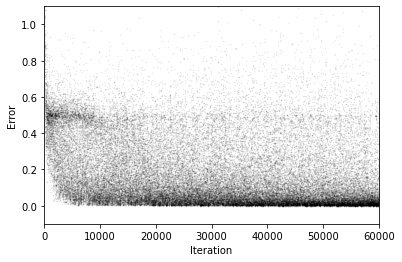

In [8]:
plt.scatter(list(range(0, 60000)), errors, s=0.2, alpha=0.1, color='k')
plt.xlim(0, 60000)
plt.ylim(-0.1, 1.1)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

### Model test

In [9]:
x_test = test_image.reshape(-1, 28*28)
x_test = x_test / 255

In [10]:
pred = []
for x in x_test:
    pred.append(np.argmax(net.forward(x)))
pred = np.array(pred)                

In [11]:
accuracy = np.mean(pred == test_label)

In [12]:
print('Accuracy = %.2f %%'%(accuracy*100))

Accuracy = 88.57 %
